In [2]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense 

In [16]:
data = pd.read_csv('microsoft stock prices/all_2018-03-26_2022_23.csv')
data['Date'] = pd.to_datetime(data['Date'])
scaler = MinMaxScaler()
numerical_features = ['Open', 'High', 'Low', 'Volume']
data[numerical_features] = scaler.fit_transform(data[numerical_features])
data_close=data.filter(['Close'])
dataset=data_close.values
training_data_len=math.ceil(len(dataset)*0.8)

print("MEAN of processed data: ", data[numerical_features].mean())
print("Standard deviation of processed data: ",data[numerical_features].std())

MEAN of processed data:  Open      0.386457
High      0.380933
Low       0.383176
Volume    0.209371
dtype: float64
Standard deviation of processed data:  Open      0.285983
High      0.285412
Low       0.285470
Volume    0.131915
dtype: float64


In [4]:
columns_to_drop = ['GNewsTitle', 'GDeltTitle', 'Adj Close']
data = data.drop(columns=columns_to_drop)
data['Date']= pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1001 entries, 2018-03-26 to 2022-03-23
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1001 non-null   float64
 1   High    1001 non-null   float64
 2   Low     1001 non-null   float64
 3   Close   1001 non-null   float64
 4   Volume  1001 non-null   float64
dtypes: float64(5)
memory usage: 46.9 KB


In [5]:
X_train, X_test = data[:training_data_len], data[training_data_len:]
y_train, y_test = data['Close'][:training_data_len], data['Close'][training_data_len:]

X_train.shape[0]

801

In [6]:
model= Sequential()
model.add(LSTM(200,return_sequences=True,input_shape=(X_train.shape[1], 1)))
model.add(LSTM(200,return_sequences=False))
model.add(Dense(100))
model.add(Dense(50))
model.add(Dense(1))

In [7]:
model.compile(optimizer='adam',loss='mean_squared_error')
history = model.fit(X_train,y_train,epochs=20)

Epoch 1/20
26/26 [==============================] - 2s 10ms/step - loss: 15982.1943
Epoch 2/20
26/26 [==============================] - 0s 10ms/step - loss: 2722.6997
Epoch 3/20
26/26 [==============================] - 0s 10ms/step - loss: 2394.6624
Epoch 4/20
26/26 [==============================] - 0s 10ms/step - loss: 1458.6688
Epoch 5/20
26/26 [==============================] - 0s 11ms/step - loss: 120.8331
Epoch 6/20
26/26 [==============================] - 0s 10ms/step - loss: 31.0595
Epoch 7/20
26/26 [==============================] - 0s 10ms/step - loss: 12.0850
Epoch 8/20
26/26 [==============================] - 0s 10ms/step - loss: 8.6997
Epoch 9/20
26/26 [==============================] - 0s 10ms/step - loss: 6.2086
Epoch 10/20
26/26 [==============================] - 0s 10ms/step - loss: 5.2581
Epoch 11/20
26/26 [==============================] - 0s 10ms/step - loss: 5.1673
Epoch 12/20
26/26 [==============================] - 0s 10ms/step - loss: 4.7183
Epoch 13/20
26/26 [=

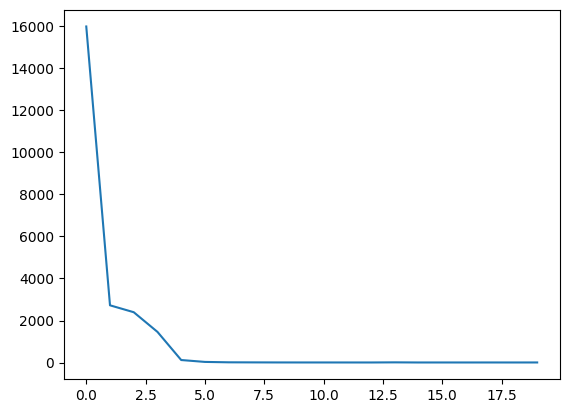

In [8]:
plt.plot(history.history['loss'])

In [9]:
predictions =model.predict(X_test)
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Predictions']=predictions

7/7 [==============================] - 0s 3ms/step


/var/folders/vl/87j6bs1s2l36fj2qj8r53wrc0000gn/T/ipykernel_11491/4193653096.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions']=predictions


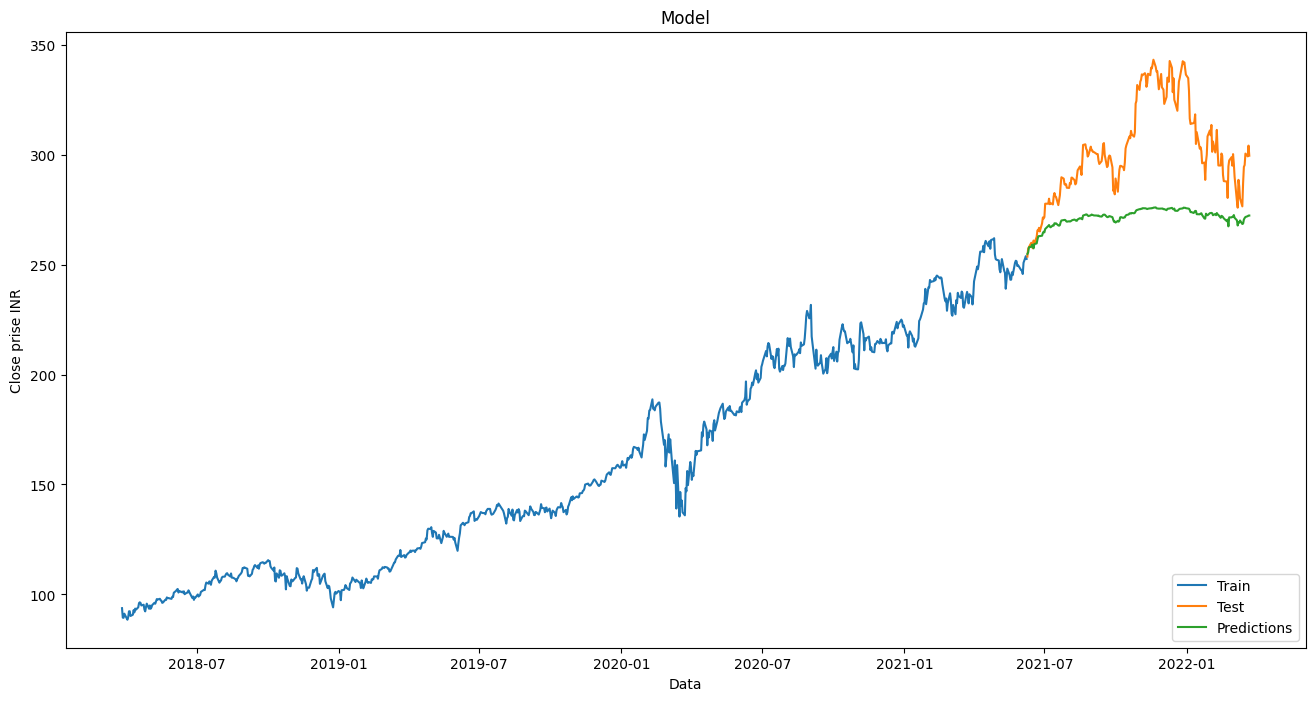

In [10]:
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Data')
plt.ylabel('Close prise INR')
plt.plot(train['Close'])
plt.plot(valid[['Close','Predictions']])
plt.legend(['Train','Test','Predictions'],loc='lower right')
plt.show()

In [34]:
start_index =  data.query("Date == '2021-01-04'").index[0]
end_index = data.query("Date == '2021-03-01'").index[0]
X_train, X_test = data[:start_index].merge(data['Close'][end_index:]), data[start_index:end_index]
y_train, y_test = data['Close'][:start_index] + data['Close'][end_index:], data['Close'][start_index:end_index]


X_train.shape
# data["Date"]
# print(end_index)

(0, 9)